<a href="https://colab.research.google.com/github/Khiem472/TTNT/blob/master/tensor%20_board.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt


In [16]:
batch_size = 4
train_set = torchvision.datasets.FashionMNIST(root='./root', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

test_set = torchvision.datasets.FashionMNIST(root='./root', train=False, transform=transforms.ToTensor(), download=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [9]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
import numpy as np
def show_image(img):
  img = img.numpy()
  plt.imshow(np.transpose(img, (1,2,0)))
  plt.plot()

examples = iter(train_loader)
images, labels = examples.next()

#make_grid of image
images = torchvision.utils.make_grid(images)


In [5]:
import torch.nn as nn
import torch.nn.functional as f

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.pool = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(16*4*4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = self.pool(f.relu(self.conv1(x)))
    x = self.pool(f.relu(self.conv2(x)))
    x = x.view(-1, 16*4*4)
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):
  for i, (images, labels) in enumerate(train_loader):
    outputs = net(images)
    optimizer.zero_grad()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

print("complete")

complete


Predicted:  Ankle Boot Pullover Trouser Trouser
Accuracy of the network on the 10000 test images: 88 %


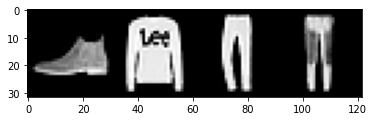

In [23]:
test = iter(test_loader)
images, labels = test.next()


output = net(images)
_, predicted = torch.max(output, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batch_size)))
images = torchvision.utils.make_grid(images, nrow=batch_size)
show_image(images)

correct = 0
total = 0
with torch.no_grad():
   for data in test_loader:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
